In [82]:
from IPython.core.display import HTML

HTML('''
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code" align="center" " ></form>
''')

# Introduction

This project consists in the application of some machine learning algorithms and techniques explained in the Mathematics and Machine Learning course. The dataset we will focus on is composed of just 300 entries. Since we are dealing with a relatively small dataset, the goal of this project is not to obtain the perfect scores by performing grid searches on different parameters. Because of this, we will not use a separated validation set, but we will be using the same subset for both validation and test.


### Index
*  **Exploratory Data analisys**
    * Imports
    * Dataset
    * Feature distribution
        * Numerical features analyisis
        * Categorical features analyisis
    * Feature standardization
    * BoxPlot
    * Violin Plot
    * Correlation matrix
    * Class imbalance
    
    
*  **Classification models**
    * Decision Tree
    * Random forest
    * Linear Regression
    * Logistic regression
    * Support vector machines
        * Linear SVM
            * Soft Margin
            * Hard margin
        * Kernel trick
    * PCA
    * Naive Bayes
        

*  Conclusions


# Exploratory data analisys

## Imports

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.animation as animation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.svm import LinearSVC

The libraries used in this project are:
* **Numpy**: to perform easily math operations on arrays and matrices
* **Pandas**: to work easily with dataframes
* **Matplotlib, Seaborn and Plotly**: for graphs
* **Sklearn**: for machine learning algorithms

##  Dataset 

The Statlog Heart dataset, chosen for this project, is based on a bigger dataset already present in the machine learning repository (https://archive.ics.uci.edu/ml/datasets/Heart+Disease). This original database contained 76 attributes. However, all major published studies used only 14 of them (13 features and one prediction label). These features are the ones that are made available in the dataset that will be used in this project.

The dataset contains 270 observations of patients, with or without a diagnosed condition of heart disease. Given the small number of observations, the validation set will not be created with holdout, and we will be using only a training set and a test set.
Because of the same reason, we will not focus on obtaining the perfect scores for the algorithms, and we will not dedicate too many resources into the tuning of hyperparameters. The main focus will be on understanding the inner workings of the algorithms, gaining knowledge about the math behind commonly used machine learning algorithms.

The dataset is composed both of categorical and numerical variables. 

While some of these features are diagnosticable only from a medical professional, some others can actually be diagnosed by a patient at home, with some cheap instrumentation (like a blood pressure cuff, a glucometer...).

The features are the following:

| Feature  | Meaning | Diagnosticable by |
| :------------- | :------------- | :------------- |
| `age`   |Age of the patient |patient |
| `sex` |Woman or man |patient |
| `cp` |Chest pain type (values 1 to 4)|doctor|
| `trestbps` |Resting blood pressure |patient with blood pressure cuff| 
| `chol` |Serum cholesterol in mg/dl |doctor |
| `fbs` |Fasting blood sugar > 120 mg/dl  |patient with glucometer|
| `restecg` |Resting electrocardiographic results (values 0,1,2)  |doctor |
| `thalach` |Maximum heart rate achieved |patient with holt|
| `exang` |Exercise induced angina (1 = yes; 0 = no)| patient|
| `oldpeak` |ST depression induced by exercise relative to rest | doctor|
| `slope` |The slope of the peak exercise ST segment (values, 1, 2, 3) |doctor |
| `ca` |Number of major vessels (0-3) colored by flourosopy | doctor|
| `thal` |3 = normal; 6 = fixed defect; 7 = reversable defect  |doctor|
|  |  |  ||
| `label` |Absence(1) or presence(2) of heart disease | |

Let's now explore the dataset:

In [193]:
data = pd.read_csv("heart.csv")
data.head()
#patient_check_data = data.drop(["cp", "chol", "restecg", "oldpeak", "slope", "ca", "thal"], 1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [194]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


## Feature distributions

In this dataset we can find both numerical and categorical features:

**numerical features**:
- Age
- Resting blood pressure
- Serum cholesterol
- Maximum heart rate
- ST depression

**categorical features**
- ST segment slope
- Number of major vessels
- Chest Pain type
- Resting electrocardiographic results
- Thalassemia
- Sex
- Fasting blood sugar
- Exercise induced angina


In [195]:
numerical_features = {"Age":"age", 
                      "Resting blood pressure":"trestbps", 
                      "Serum cholesterol (mg/dl)":"chol", 
                      "Maximum heart rate": "thalach", 
                      "ST depression":"oldpeak"
                     }
ordered_features = {"ST segment slope":"slope",
                    "Number of major vessels":"ca"
                   }
categorical_features = {"Chest Pain type":"cp", 
                        "Resting electrocardiographic results":"restecg", 
                        "Thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)":"thal"
                       }
binary_features= {"Sex":"sex", 
                  "Fasting blood sugar > 120 mg/dl":"fbs", 
                  "Exercise induced angina":"exang"}
all_features = {**numerical_features, **ordered_features, **categorical_features, **binary_features}

label = {"Absence":1,
         "Presence":2}

In [197]:
not_numerical_features = {} # Create dictionary with all the features thate are not numerical, for data exploration
not_numerical_features.update(ordered_features)
not_numerical_features.update(categorical_features)
not_numerical_features.update(binary_features)

###  Numerical features analysis 

When it comes to numerical features, since we are dealing with a small number of entries in the dataset, we can use a  kernel density estimate (KDE) plot, in order to have a smoother picture of the distribution 

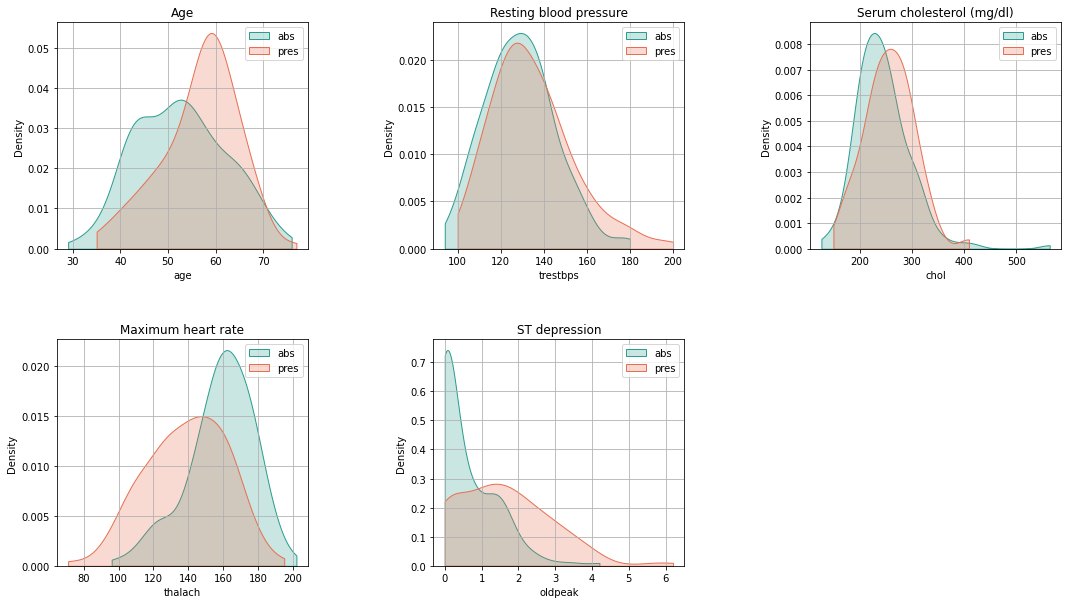

In [198]:
plt.figure(figsize=(18, 10))

for i, feat in enumerate(numerical_features.keys()):
    fig= plt.subplot(2, 3, i+1)
    plt.subplots_adjust(hspace =.4, wspace=.5)
    plt.grid(True)
    plt.title(feat)
    sns.kdeplot(data.loc[data["label"]==1, numerical_features[feat]], label="abs", color = "#2A9D8F", shade=True, cut=0)
    sns.kdeplot(data.loc[data["label"]==2, numerical_features[feat]], label="pres",  color = "#E76F51", shade=True, cut=0)
    fig.legend()

###  Categorical features analysis

In order to analyze categorical features, we can plot some bar charts in order to visualize the distribution of categorical values according to the presence or absence of heart disease. 

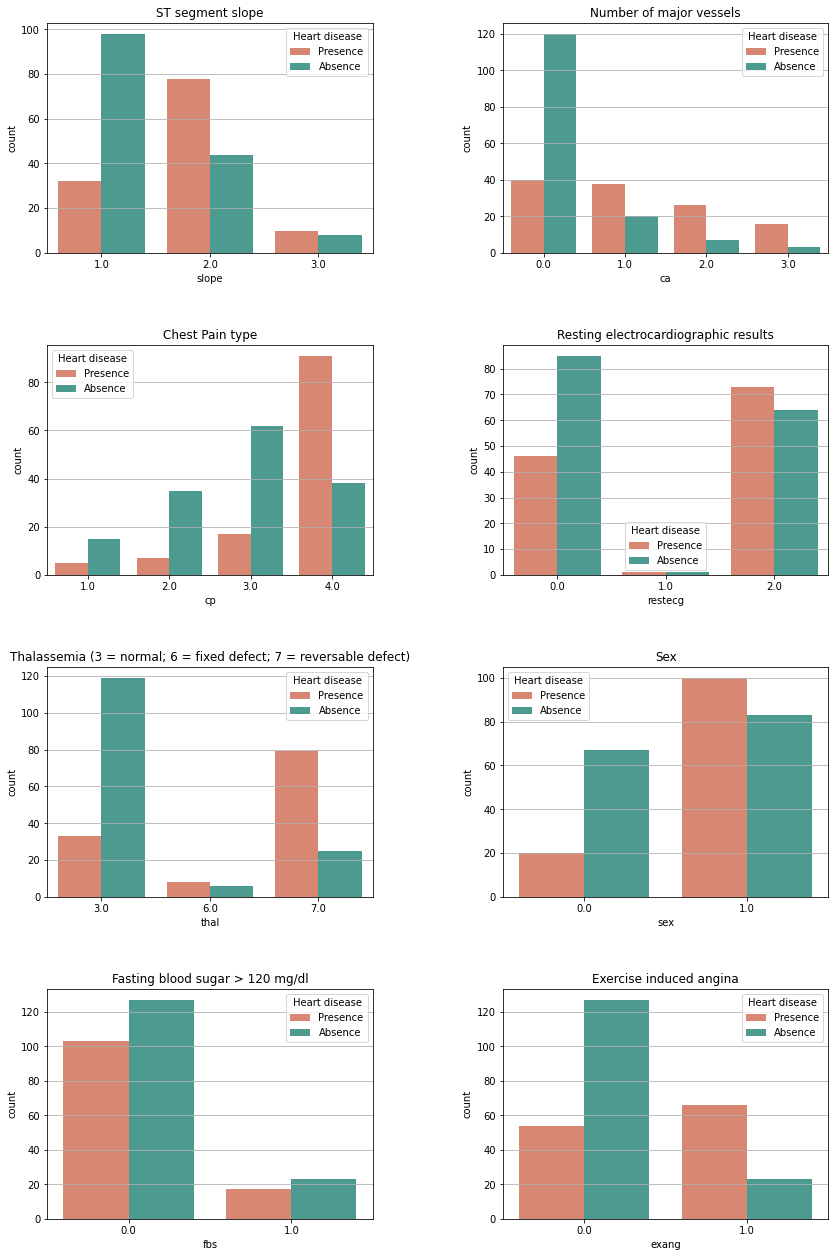

In [107]:
plt.figure(figsize=(14, 22))
enriched_data = data.copy()
enriched_data["Heart disease"] = data["label"].replace({1: "Absence", 2: "Presence"})

for i, feat in enumerate(not_numerical_features.keys()):
    plt.subplot(4, 2, i + 1)
    plt.grid(True)
    plt.title(feat)
    plt.subplots_adjust(hspace =0.4, wspace=0.4)
    sns.countplot(data=enriched_data, x=not_numerical_features[feat], hue="Heart disease", palette = ["#E76F51", "#2A9D8F"], alpha=0.9, linewidth=1)

## Feature standardization

Since we will be using algorithms that are influenced by the scale of the input features, it is useful to standardize the numerical features like this:

\begin{align}
{z = \frac{(x−\bar{x})}{\hat{\sigma}}}
\end{align}

where $x$ is the input data, $\bar{x}$ is the estimated expected value and $\hat{\sigma}$ is the estimated standard deviation. 
Another reason for applying feature standardization, is that gradient descent converges faster with it.

In [199]:
data_norm = data.copy()

for i, col in enumerate(all_features.keys()):
    data_norm[[all_features[col]]] = \
    StandardScaler(with_mean=True, with_std=True).fit_transform(data_norm[[all_features[col]]])
    
X = data_norm.drop("label", axis=1)
y = data_norm["label"]

In [200]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1.712094,0.689500,0.870928,-0.075410,1.402212,-0.417029,0.981664,-1.759208,-0.701222,1.181012,0.676419,2.472682,-0.875706
1,1.382140,-1.450327,-0.183559,-0.916759,6.093004,-0.417029,0.981664,0.446409,-0.701222,0.481153,0.676419,-0.711535,1.189277
2,0.282294,0.689500,-1.238045,-0.411950,0.219823,-0.417029,-1.026285,-0.375291,-0.701222,-0.656118,-0.954234,-0.711535,1.189277
3,1.052186,0.689500,0.870928,-0.187590,0.258589,-0.417029,-1.026285,-1.932198,1.426081,-0.743600,0.676419,0.349871,1.189277
4,2.152032,-1.450327,-1.238045,-0.636310,0.374890,-0.417029,0.981664,-1.240239,1.426081,-0.743600,-0.954234,0.349871,-0.875706


## BoxPlot

Another method that can be used to observe the distribution of numerical data is the **boxplot**. It is based on 5 numbers: minimum, maximum, median, first and third quartile. 

In [201]:
numerical_feat_norm = data_norm.drop([not_numerical_features[f] for f in not_numerical_features.keys()], axis=1)
melted_data = pd.melt(numerical_feat_norm,id_vars="label",
                    var_name="features",
                    value_name='value')
melted_data["label"] = ["Absence" if l == 1 else "Presence" for l in melted_data["label"]] 
fig = px.box(melted_data, x="features", y="value", color="label", color_discrete_sequence=["#E76F51", "#2A9D8F"])
fig.update_traces(quartilemethod="exclusive")
fig.show()

## Violin Plot

Violin plot  is another way to observe the distribution of numerical data. They are similar to box plots, but they can show us the probability density of the data, instead of splitting it arbitrarily into quartiles.

In [202]:
fig = go.Figure()

fig.add_trace(go.Violin(x=melted_data["features"][melted_data['label'] == 'Absence'],
                        y=melted_data["value"][melted_data['label'] == 'Absence'],
                        legendgroup='Absence', scalegroup='Yes', name='Absence',
                        side='negative',
                        line_color="#2A9D8F")
             )
fig.add_trace(go.Violin(x=melted_data["features"][melted_data['label'] == "Presence"],
                        y=melted_data["value"][melted_data['label'] == "Presence"],
                        legendgroup='Presence', scalegroup='No', name='Presence',
                        side='positive',
                        line_color="#E76F51")
             )
fig.update_traces(meanline_visible=True)
fig.update_layout(violingap=0, violinmode='overlay')
fig.show()

## Correlation matrix

Another important step to perform when exploring the training data, is to see if some features are correlated with each other. An high correlation could lead to the removal of a feature, if this was deemed to create a faster algorithm, without losing accuracy. In the following table, we will compare each feature with all of the others, by using the **Pearson's correlation coefficient**:

${\displaystyle \rho _{X_1,X_2}={\frac {\operatorname {cov} (X_1,X_2)}{\sigma _{X_1}\sigma _{X_2}}}}$ 

Where $cov$ stands for the covariance measure:

${\displaystyle \operatorname {cov} (X_1,X_2)=\operatorname {E}{{\big [}(X_1-\operatorname {E} [X_1])(X_2-\operatorname {E} [X_2]){\big ]}},}$

That is computed for every pair of features ${X_1}$ and ${X_2}$

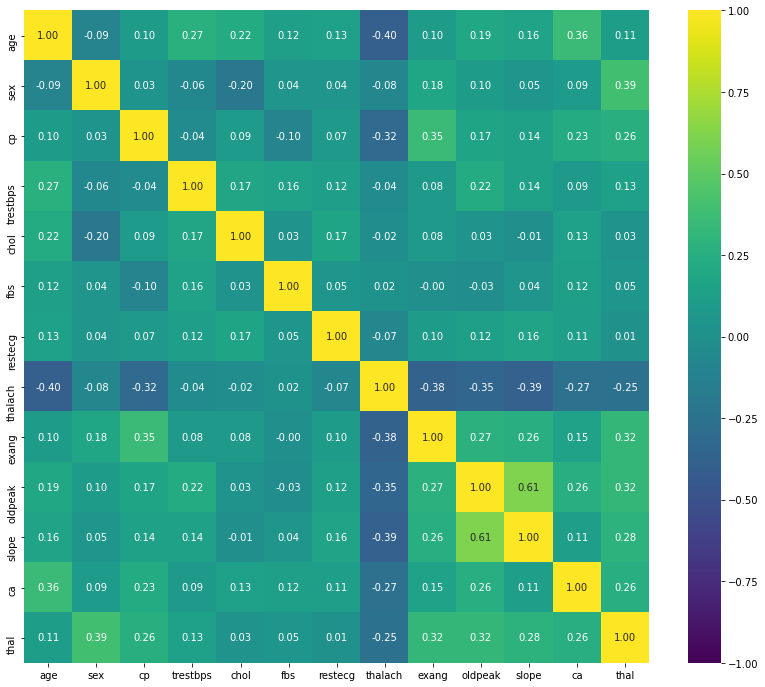

In [14]:
plt.figure(figsize=(14, 12))
correlation = X.corr(method='pearson')
sns.heatmap(correlation, vmin=-1, vmax=1, cmap="viridis", annot=True, fmt='.2f');

The only correlation that would be considered to be hig is the one between `slope` and `oldpeak`. The reason is intuitive, since both metrics are extracted from the ST segment of the ECG.

## Class imbalance

It is important to check if the two classes are evenly distributed:

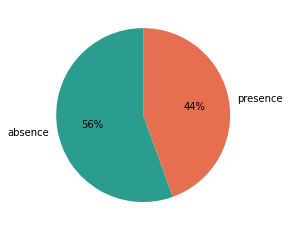

In [108]:
plt.figure(figsize=(4, 4))
plt.pie(data["label"].value_counts(),
        labels = ["absence", "presence"],
        colors = ["#2A9D8F", "#E76F51"], 
        autopct = lambda y: str(round(y))+"%",
        startangle=90);

As we can see, the class imbalance is acceptable, and we will not need re-balance the dataset with techniques such as random oversampling or SMOTE.

# Classification models

We will now evaluate different models to predict the absence or presence of heart disease in patients. 

## Decision tree 

Decision trees are one of the most widely used machine learning models. They use a top-down, greedy approach, by splitting the samples according to the **best** possible feature at the current step, and going down from that at each step, until every branch of the tree reaches a **stopping condition**.

Stopping conditions can occur when:
- The tree reaches a maximum depth
- The subset contains only elements from one class
- Another stopping criterion is met (like minimum number of elements)

### But how do we find the "best" feature to split the tree?
We can use a measure that gives us a quantitative value that tells us how good a split actually is. The most used in classification tasks is the $Gini$ index. The Gini value for a node N is the following:
\begin{align}
{G = 1-\sum_{i}^{C} p(i|N)^2} 
\end{align}
Where $p(i|N)$ is the relative frequency of class i in the current node, and C is the number of classes.

When calculating how good a split is, we can sum the gini index for each child, weighing it by the number of samples of the split:

\begin{align}
GINI_{split} = \sum_{i}^{k}\frac{n_i}{n}G_i
\end{align}

Where k is the number of childrens, $n_i$ is the number of records in the child i and n is total number of records in the node.



To train the decision tree we do not need to normalize the data. Moreover, by using the original values the final tree scheme of decisions will be more explainable.

In [190]:
X_not_norm = data.drop("label", axis=1)
y_not_norm = data["label"]

X_train, X_test, y_train, y_test = train_test_split(X_not_norm, y_not_norm, test_size= 0.33)

In [191]:
maxDepthTree = DecisionTreeClassifier(random_state=0)
maxDepthTree.fit(X_train, y_train)
outTree = maxDepthTree.predict(X_test)
print("Accuracy for Decision Tree Classifier with the maximum depth: " + str(accuracy_score(y_test, outTree)*100)+"%")

Accuracy for Decision Tree Classifier with the maximum depth: 71.11111111111111%


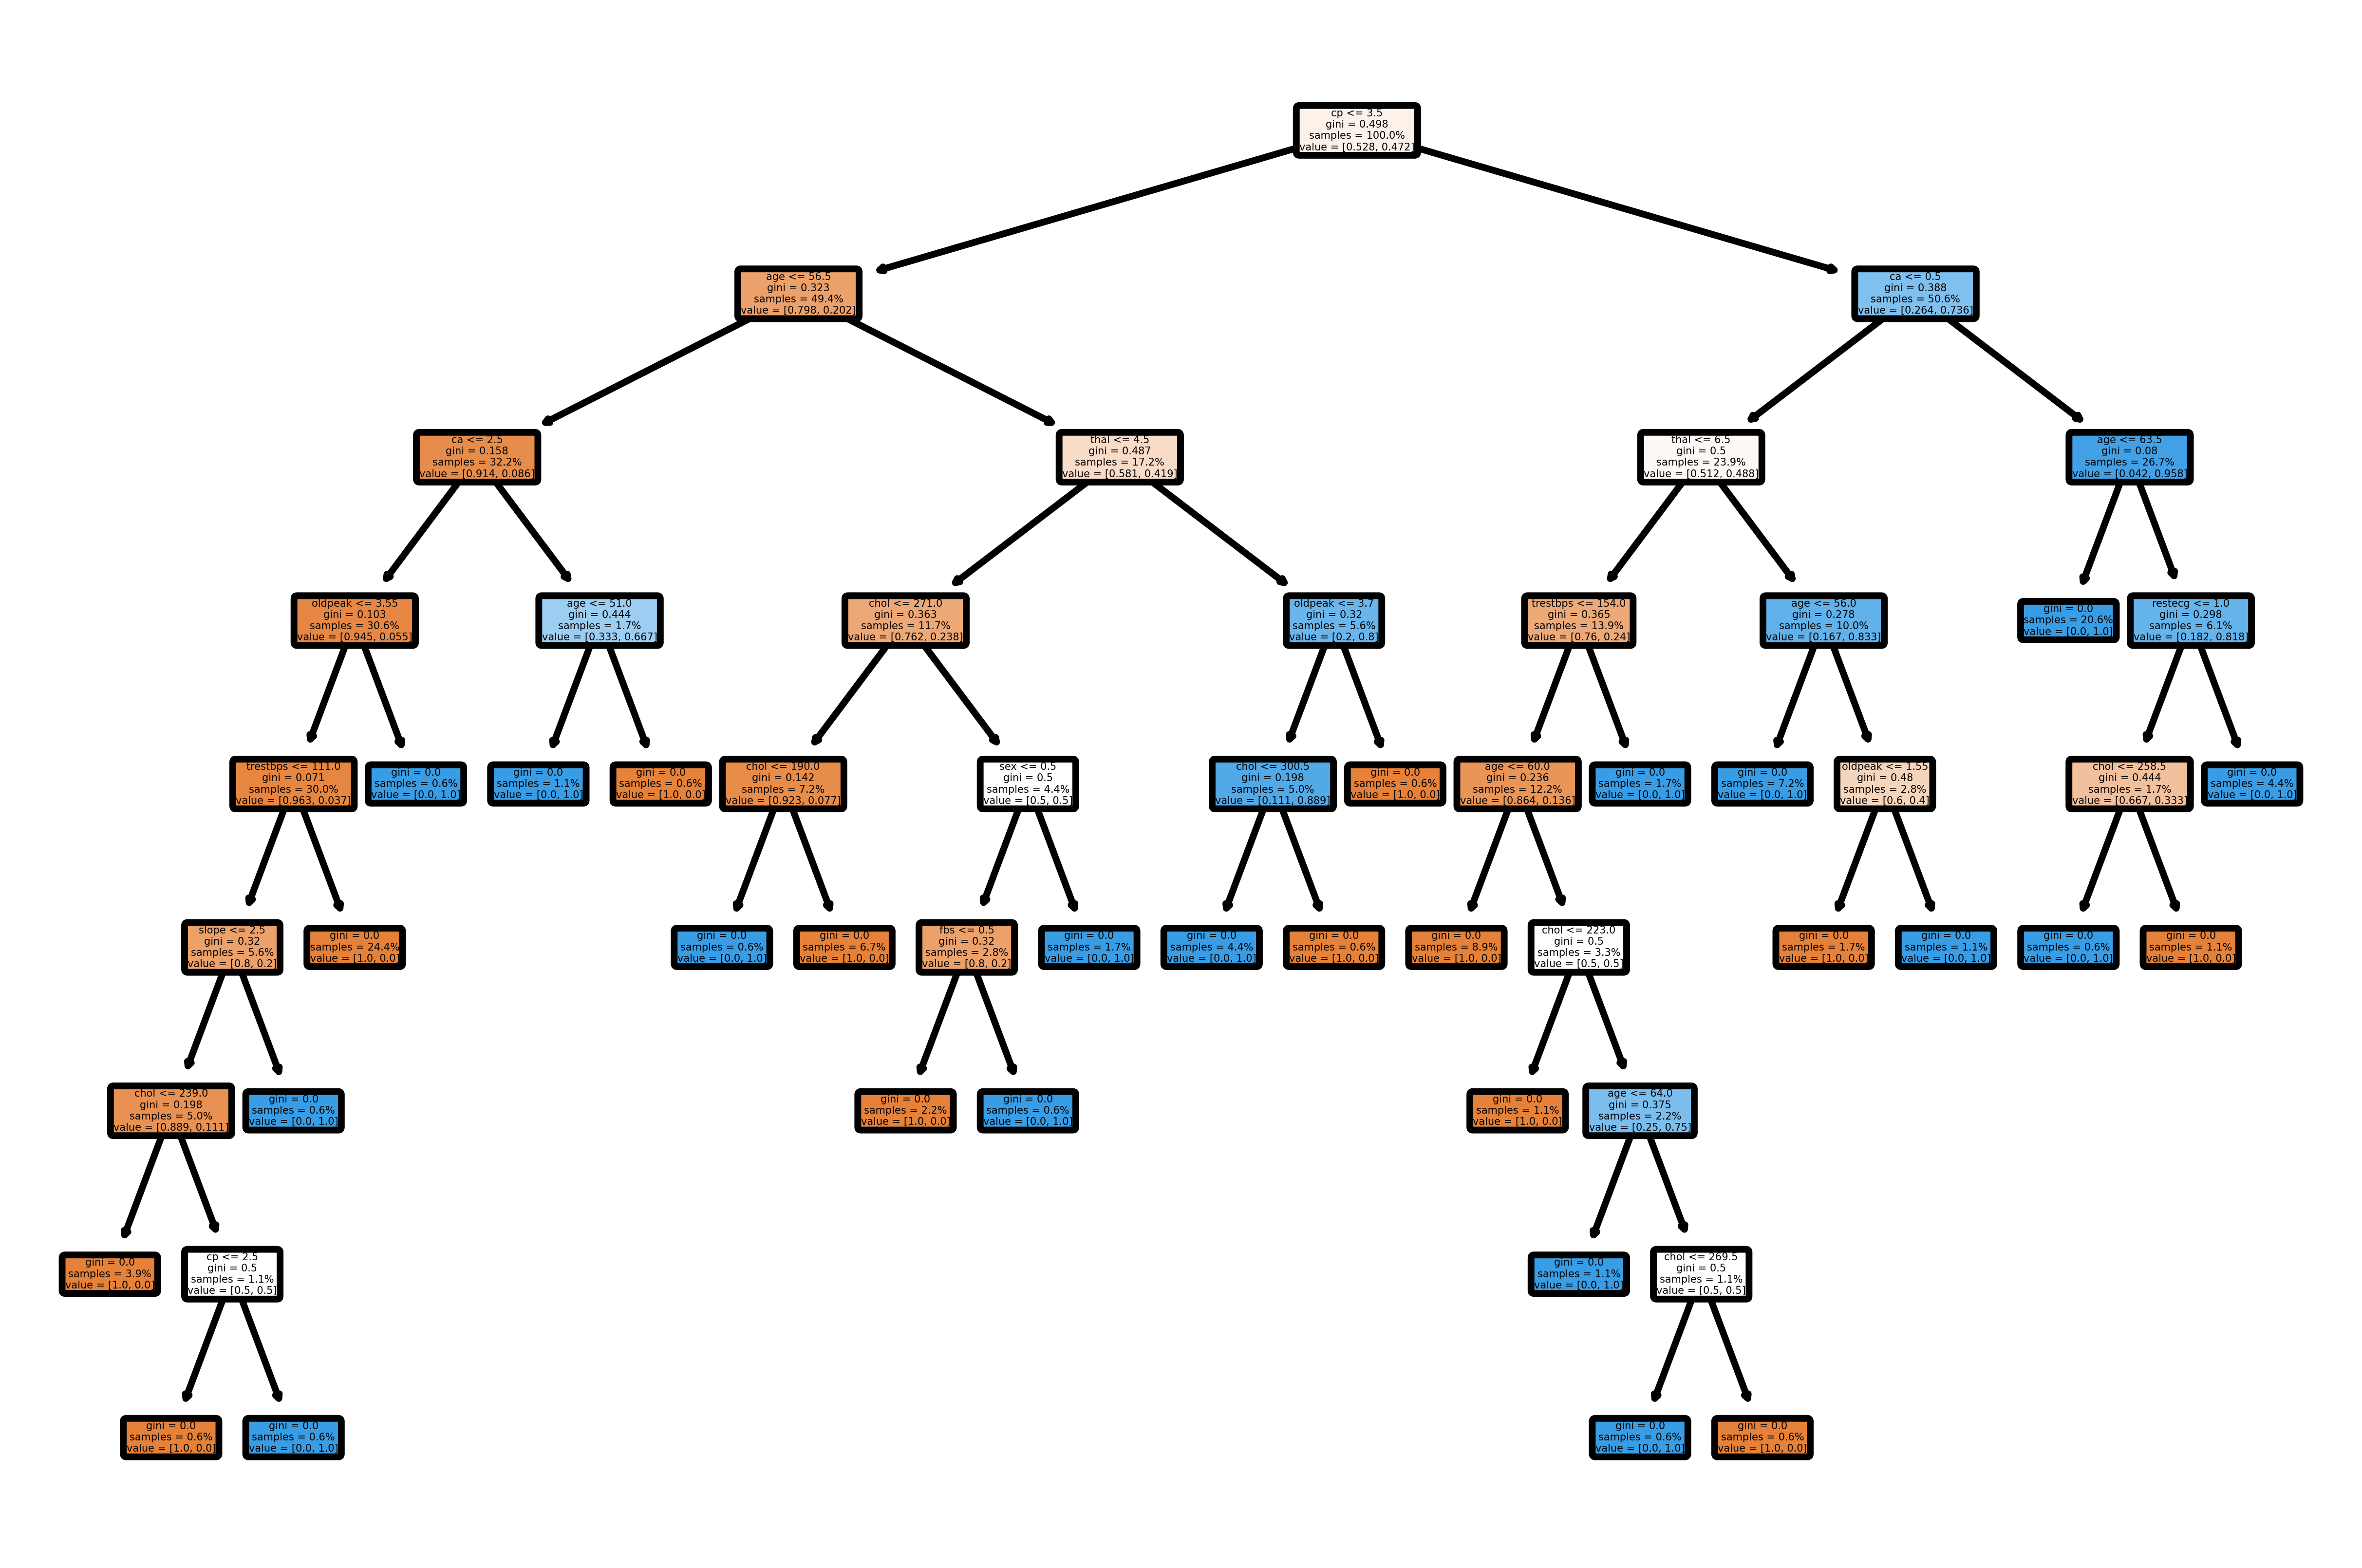

In [192]:
plt.figure(dpi=1000)
c = tree.plot_tree(maxDepthTree, filled = True, proportion = True, rounded = True, feature_names=data.keys())

It is still difficult to visualize the entire tree in this way. We can plot the decision tree for various depths with an animation:

In [133]:
depths = range(1, 10)
def customTree(depth):
    mytree = DecisionTreeClassifier(max_depth = depth)
    mytree.fit(X_train, y_train)
    tree = mytree.predict(X_test)
    print("Accuracy for Decision Tree Classifier with depth = " + str(depth) +": " + str(accuracy_score(y_test, tree)*100)+"%")
    return mytree

def plotMyTree(myTree):
    plt.figure(dpi=400)
    c = tree.plot_tree(myTree, filled = True, proportion = True, rounded = True, feature_names=data.keys())
    
def myAnimationFunction(i):
    treee = customTree(i+1)
    tree.plot_tree(treee, filled=True,
                   label='none', ax=ax1, rounded=True, proportion=True, impurity=False);
    ax1.set_title(f"Decision tree (depth: {i+1})")
    
def animate(i):
    
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=depths[i], random_state=42)
    dt.fit(X_train, y_train)
    tree.plot_tree(dt,  feature_names=data.keys(), filled=True,
                   label='none', ax=ax1, rounded=True, proportion=True, impurity=False);
    ax1.set_title(f"Decision tree (depth: {i+1})")
    
    fig.tight_layout()
    return [fig]

In [134]:
%matplotlib notebook
plt.ioff()
fig, ax1 = plt.subplots(1, 1);
%matplotlib inline 
plt.ion()
fig.set_size_inches(14, 7);


anim = animation.FuncAnimation(
                               fig, 
                               animate, 
                               frames = len(depths),
                               interval = 200, # in ms
                               );

HTML(anim.to_jshtml())

Due to its nature, the decision tree is useful to explain the workings of the model: in fact it is possible to plot the tree and to see how the prediction works. One of the problems however, is that the decision tree is too simple, and could overfit easily. One solution is to use an ensemble of trees, called **random forest**.


Below, we can see the metrics regarding decision trees, computed for different values of max depth.
For each tree we evaluate 4 different metrics:

* **Accuracy**: it's the most intuitive measure for assessing the performance of a model: it's just a ratio between the correct predictions and the total number of predictions.


<center>
$Accuracy = \frac{TP+TN}{TP+FP+FN+TN}$
</center>


* **Precision**: It's the ratio between correctly predicted positive observations and total predicted positive observations. It means: out of all the ones categorized as healthy patients, how many are actually healty?
    
    
    
<center>
$Precision = \frac{TP}{TP+FP}$
</center>

   
* **Recall** : It's the ratio between correctly predicted positive observations and all the observations for that class. It answers to the question: of all healty patients, how many did we labelled as healty?


<center>
$Recall = \frac{TP}{TP+FN}$
</center>

* **F1 score**: It's a weighted average of precision and recall. 


<center>
$F1 = 2*\frac{(Recall*Precision)}{(Precision+Recall)}$
</center>


In [135]:
depth = range(1, 15)

acc, rec, pre, f1 = [], [], [], []


for d in depth: 
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=d, class_weight=None)
    dt.fit(X_train, y_train)
    pred = dt.predict(X_test)
    acc.append(accuracy_score(y_test, pred))
    rec.append(recall_score(y_test, pred))
    pre.append(precision_score(y_test, pred))
    f1.append(f1_score(y_test, pred))

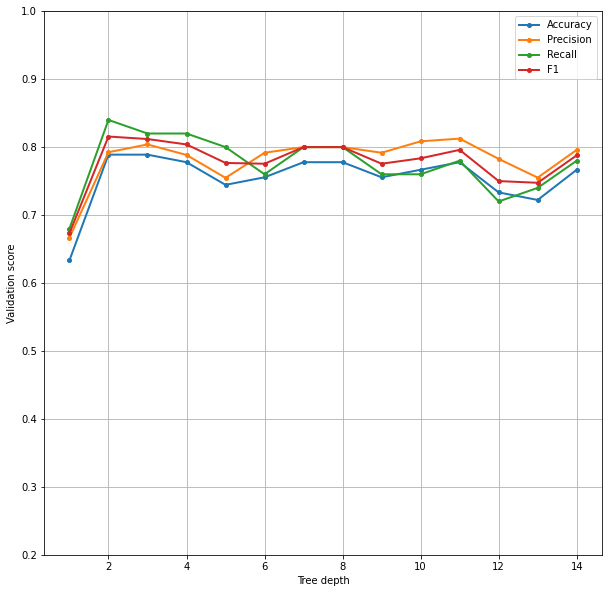

In [136]:
lb = 0.2

plt.figure(figsize=(10, 10))

# accuracy

plt.plot(list(depth), acc, label="Accuracy", marker='o', linewidth=2, markersize=4)

#precision
plt.plot(list(depth), pre, label="Precision", marker='o', linewidth=2, markersize=4)

# recall
plt.plot(list(depth), rec, label="Recall", marker='o', linewidth=2, markersize=4)

#f1 score
plt.plot(list(depth), f1, label="F1", marker='o', linewidth=2, markersize=4)
plt.ylabel("Validation score")
plt.xlabel("Tree depth")
plt.grid(True)
plt.ylim(lb, 1)

plt.legend()


## Random forest

A random forest is an ensemble method, based on multiple decision trees.

An **ensemble method** is a machine learning technique that leverages multiple independent base models, in order to achieve a better performance over all. In our case we combine multiple decision trees to obtain a final prediction.

When sampling the data for decision trees, **bootstrapping** is used. It is a technique that allows us to sample the training data with replacement. It allows us to decrease the variance of the statistical learning method, making the trees less correlated between each other. 

We also apply **feature bagging**: it's a technique that allows us to select only a small subset of features to train the single trees, thus helping making the trees less correlated between each other.
Usually, the subset is composed of √n elements, where n is the total number of features.



In [137]:
X_train, X_test, y_train, y_test = train_test_split(X_not_norm, y, test_size= 0.33)

In [164]:
randomForest = RandomForestClassifier(n_estimators = 1000, max_features = "sqrt", max_depth = 10)
randomForest.fit(X_train, y_train)
prediction = randomForest.predict(X_test)
print("Accuracy for Random Forest Classifier with sqrt(features): " + str(accuracy_score(y_test, prediction)*100)+"%")

Accuracy for Random Forest Classifier with sqrt(features): 81.11111111111111%


In [139]:
depth = range(1, 15)
trees = [5, 20, 50, 100, 200]
acc, rec, pre, f1 = [], [], [], []

for t in trees:
    acc_list, rec_list, pre_list, f1_list = [], [], [], []
    for d in depth:
        randomForest = RandomForestClassifier(n_estimators = t, random_state = 2, max_features = "sqrt", max_depth = d)
        randomForest.fit(X_train, y_train)
        prediction = randomForest.predict(X_test)

        acc_list.append(accuracy_score(y_test, prediction))
        rec_list.append(recall_score(y_test, prediction))
        pre_list.append(precision_score(y_test, prediction))
        f1_list.append(f1_score(y_test, prediction))
    acc.append(acc_list)
    rec.append(rec_list)
    pre.append(pre_list)
    f1.append(f1_list)

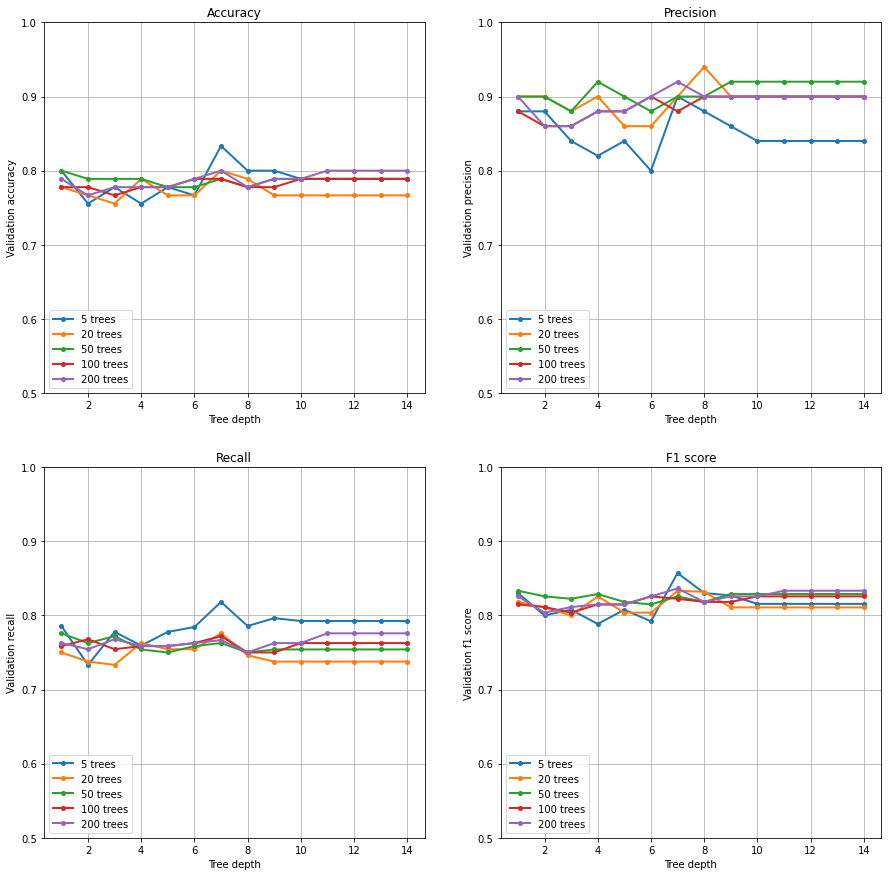

In [140]:
lb = 0.5

plt.figure(figsize=(15, 15))

# accuracy
plt.subplot(2, 2, 1)
for n, a in enumerate(acc):
    plt.plot(list(depth), a, label=str(trees[n]) + " trees", marker='o', linewidth=2, markersize=4)
plt.ylabel("Validation accuracy")
plt.xlabel("Tree depth")
plt.title("Accuracy")
plt.grid(True)
plt.ylim(lb, 1)
plt.legend(loc=3)

#precision
plt.subplot(2, 2, 2)    
for n, r in enumerate(rec):
    plt.plot(list(depth), r, label=str(trees[n]) + " trees", marker='o', linewidth=2, markersize=4)
plt.ylabel("Validation precision")
plt.xlabel("Tree depth")
plt.title("Precision")
plt.grid(True)
plt.ylim(lb, 1)
plt.legend(loc=3)

# recall
plt.subplot(2, 2, 3)    
for n, p in enumerate(pre):
    plt.plot(list(depth), p, label=str(trees[n]) + " trees", marker='o', linewidth=2, markersize=4)
plt.ylabel("Validation recall")
plt.xlabel("Tree depth")
plt.title("Recall")
plt.grid(True)
plt.ylim(lb, 1)
plt.legend(loc=3)

#f1 score
plt.subplot(2, 2, 4)    
for n, f in enumerate(f1):
    plt.plot(list(depth), f, label=str(trees[n]) + " trees", marker='o', linewidth=2, markersize=4)
plt.ylabel("Validation f1 score")
plt.xlabel("Tree depth")
plt.title("F1 score")
plt.grid(True)
plt.ylim(lb, 1)
plt.legend(loc=3)




## Linear Regression

Linear regression is a very simple machine learning model. It aims to find the linear equation:<br><br>
<center>
${Y=X \beta + \epsilon}$ 
</center>
<br>

**X** is the training data in a matrix form. It has a row for each element of the training set, and a column for each predictor.

**Y** is the response vector, containing all the labels for each element of the training set. 

$\beta$ is a vector of unknown parameters (the goal of the algorithm is to find it)

$\epsilon$ is a vector of errors (random variables that we cannot observe)

<br><br>
The goal of the algorithm is to find $\beta$ in order to minimize the sum of squared errors:
<br><br>


<center>
${|| Y -  X \beta ||^2}$ 
</center>
<br>

When makig a prediction on some new input features  $X_{i}$, the vector $\beta$ will be used in linear combination with $X_{i}$, to obtain the prediction $y_{i}$



Usually, linear regression is not suggested for a binary classification. However, we will try to apply it anyway, in to compare it with a **logistic regression** model: an algorithm that is better suited for binary classification

In [154]:
X_train_regr, X_test_regr, y_train_regr, y_test_regr = train_test_split(X, y, test_size= 0.33, random_state=1)
y_train_regr[y_train_regr==1]=0
y_train_regr[y_train_regr==2]=1
y_test_regr[y_test_regr==1]=0
y_test_regr[y_test_regr==2]=1

In [155]:
lr = linear_model.LinearRegression()
lr.fit(X_train_regr, y_train_regr)
pred = lr.predict(X_test_regr)
pred[pred>=0.5]=1
pred[pred<0.5]=0

In [156]:
print("Accuracy: " + str(accuracy_score(y_test_regr, pred)*100)+"%")
print("Recall: " + str(recall_score(y_test_regr, pred)*100)+"%")
print("Precision: " + str(precision_score(y_test_regr, pred)*100)+"%")
print("F1 score : " + str(f1_score(y_test_regr, pred)*100)+"%")

Accuracy: 81.11111111111111%
Recall: 71.11111111111111%
Precision: 88.88888888888889%
F1 score : 79.01234567901234%


## Logistic regression

Logistic regression is a generalized linear model, where we change the link function from the identity to a logit $log(\frac{p}{1-p})$.
Where p is the predictor.
<br>
<br>
With **link function** we are talking about a function connecting the prediction with the linear combination between X and $\beta$.
<br>

As we can see from the image below, with the logit the interval of possible values is restricted to an interval between 0 and 1, creating a sigmoid (inverse of the logit function).



<img src="./linear_vs_logistic_regression.jpg" width="700" alt="">


In [144]:
solver = "liblinear"
multi_class = "auto"

# oversampled
lr = LogisticRegression(random_state=2)

lr.fit(X_train_regr, y_train_regr)
pred = lr.predict(X_test_regr)

In [145]:
print("Accuracy: " + str(accuracy_score(y_test_regr, pred)*100)+"%")
print("Recall: " + str(recall_score(y_test_regr, pred)*100)+"%")
print("Precision: " + str(precision_score(y_test_regr, pred)*100)+"%")
print("F1 score : " + str(f1_score(y_test_regr, pred)*100)+"%")

Accuracy: 81.11111111111111%
Recall: 71.11111111111111%
Precision: 88.88888888888889%
F1 score : 79.01234567901234%


## Support vector machines

A SVM is a really powerful and useful algorithm, that can be used both for regression and for classification.
<br>
We will start from the simplest type of SVM algorithm, linearSVM

### LinearSVM

The goal is to find the optimal hyperplane, capable of splitting the dataset into the two classes while maximizing the margin.
<br><br>

As we can see from the image, there are a lot of different possible planes. Our goal is to find the plane in the right image: here the distance from the closest red and blue points is the same. We will call these points support vectors, and the distance between the line and the closest points will be called distribution margin.
<br>
<br>
This does not guarantee that the classification of new points will me correct 100\% of the time, but it is reasonable to assume that this line is better than the others on the left image, when it comes to splitting the data. So the goal is to find the hyperplane maximizing the distance. This first simple implementation is known as **hard margin SVM**

If we consider **W** as the vector describing our hyperplane, and **b** as the distance from the support vectors, the goal of the problem will be to maximize the distance, while making sure that all the points are classified correctly:

${min_{W,b} \frac{1}{2}‖W‖^2 \space\space s.t. \space\space \forall i,\space\space y_i \big(\langle W,x_i\rangle+b \big)>1}
$

<img src="./SVM_hard.png" width="400" alt="">

<br>
<br>
As one can imagine, this first implementation of the SVM can have some problems when it comes to the classification of real world data.
In fact, the majority of real world problems are not linearly separable. We can add some relaxation constraints with soft margin SVM:
<br>
<br>

### **Soft margin SVM**
<br>
In this implementation, we add a relaxation parameter to the hard constraint of the original hard margin SVM algorithm. We will add a **slack variable** $\xi_i$, corresponding to the distance of the $i_{th}$ element from the margin, given that  $\xi_i$ is on the other side (in case of a correctly classified point, $\xi_i$ will be 0). 
Then, we will apply a constant **C** to the relaxation coefficients:

${min_{W,b} \Big( \frac{1}{2}‖W‖^2 \space + \space C  \sum_{i=1}^{m} {\xi_i}}\Big) $

Basically, for a smaller value of C, our tollerance for error increases. As a drawback, the margin gets bigger. Higher values of C will be used when we want to avoid wrong classification.


## **Kernel trick**

Sometimes, when a problem is not linearly separable in the original feature space, it could make sense to move to an higher dimentional space, allowing us to create a better separation. This can be achieved with the use of a **kernel function**. This function will map the data into a new feature space. Some of the most common kernel functions are the **polynomial kernel** and the **Gaussian kernel**.



<img src="./linear_svm.png" width="400" alt="">


In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33)
model = LinearSVC(C=10, max_iter = 10000)
model.fit(X_train, y_train)
print("Accuracy for LINEARSVC: " + str(model.score(X_test, y_test)*100)+"%")

Accuracy for LINEARSVC: 82.22222222222221%


In [147]:
C=1.0
svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
rbf_svc = svm.SVC(kernel='rbf', gamma=1, C=C).fit(X_train, y_train)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X_train, y_train)

In [148]:
for i, clf in enumerate((svc, rbf_svc, poly_svc)):
    print("Accuracy for " + str(clf) + ": "+ str(clf.score(X_test, y_test)*100)+"%")

Accuracy for SVC(kernel='linear'): 81.11111111111111%
Accuracy for SVC(gamma=1): 53.333333333333336%
Accuracy for SVC(kernel='poly'): 74.44444444444444%


## PCA

The goal of Principal component analysis is to represent the input data into a space of a smaller size, reducing the number of dimensions. The idea is to create a subspace that is capable of minimizing the error given by the proection over the new, lower dimensional space.
<br><br>
In practice, we want to find a new coordinate system, in which the first coordinate, called the **principal component** maximizes the variance  of the scalar projection of the data on it. After this projection, we can then define the second principal component as the second greatest variance and so on.

<img src="./PCA.png" width="400" alt="">

In our case we have 13 features, so we will start from a 13th dimensional space. We will then calculate eigenvectors and eigenvalues for the 13x13 variance covariance matrix corresponding to our dataset. Eigenvector with the highest eigenvalue will represent the direction of maximum variance. We will also be interested in exactly how much variance is explained by each component, in proportion to the others. We will need this value, since we will stop creating new principal components when their cumulative variance will reach a certain parameter.

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33)
pca = PCA(n_components=10)
components = pca.fit_transform(X_train)

total_var = pca.explained_variance_ratio_.sum() * 100
arr = np.array([1,2,3,4,5,6,7,8,9,10,11])

img = go.Figure(data=go.Scatter(x=arr, y=pca.explained_variance_ratio_))
img.update_layout(
    xaxis_title="Number of principal components",
    yaxis_title="Explained variance"
)
img.show()

img = go.Figure(data=go.Scatter(x=arr, y=np.cumsum(pca.explained_variance_ratio_)))
img.update_layout(
    xaxis_title="Number of principal components",
    yaxis_title="Cumulative explained variance"
)
img.show()

As we can see, with 10 principal components, we can explain more than 90\% of the variance of the data. Usually, as a rule of thumb, a value of explained variance above this threshold could be considered as an acceptable value for the final algorithm.
<br><br>
The number of dimentions is pretty high to be visualized, so we could plot the firt 3 components, in order to see what's going on:

In [157]:
fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=y_train,
    title="3D representation of the first 3 principal components",
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()


It is still not possible to find a perfect division of the data in 3 dimensions, but we can still see some kind of separation between the groups.

## Naive Bayes

The naive bayes classifier is a probabilistic model based on the Bayes theorem. The main idea is that every feature contributes to the response variable in a way that is independent with respect to the other features.

So the main assumption that we are making here, is that our 13 features are independent between each other. If we look at the correlation matrix we can say that the features are mostly uncorrelated, for the exception of `slope` and `oldpeak`. We will drop one of the two in order to remove this correlation.
<br><br>
Our goal is to find:

$p(C_k \mid x_1, \ldots, x_n)$

Which is the probability of having a class k, given the independent n features. Thanks to the bayes theorem, we know that:

$p(C_k \mid \mathbf{x}) = \frac{p(C_k) \ p(\mathbf{x} \mid C_k)}{p(\mathbf{x})}$


Once we computed the probabilities for each class k, the naive bayes algorithm will select the most probable option and it will use it as  the classification.



In [161]:
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_not_norm, y_not_norm, test_size= 0.33)

In [162]:
gnb = GaussianNB()
gnb.fit(X_train_nb, y_train_nb)
pred = gnb.predict(X_test_nb)

In [163]:
print("Accuracy for NB: " + str(accuracy_score(pred, y_test_nb)*100)+"%")
print("Recall: " + str(recall_score(pred, y_test_nb)*100)+"%")
print("Precision: " + str(precision_score(pred, y_test_nb)*100)+"%")
print("F1 score : " + str(f1_score(pred, y_test_nb)*100)+"%")

Accuracy for NB: 87.77777777777777%
Recall: 84.44444444444444%
Precision: 90.47619047619048%
F1 score : 87.35632183908046%


## Conclusions



Without using particular validation techniques for the optimization of parameters, the final accuracy turned out to be still pretty good, around 80-90\% in some cases. We have to remember that this dataset is built starting from features that are usually used by doctors in order to understand if a certain patient had an heart attack. 
<br>
The dataset is not so large to justify a deep focus on the tuning of hyperparameters to obtain higher accuracy scores. 